In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.linear_model import Ridge
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from pandas import DataFrame
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [148]:
df = pd.read_csv('..\Initial_data\K5T2_2\K5T2_2_cor.csv', ";")
df

C:\Users\arufa\AppData\Local\Temp\ipykernel_8548\3616477596.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('..\Initial_data\K5T2_2\K5T2_2_cor.csv', ";")


,K5PS14_1.PV,K5PS14_2.PV,K5L1_1.PV,K5L1_2.PV,K5L1_3.PV,K5L1_4.PV,K5P5_1.PV,K5P5_2.PV,K5BSB_1.PV,K5BSB_2.PV,...,K5T2_1.PV,K5T2_2.PV,K0P102_1.PV,K0T104_2.PV,K5F6X.PV,K5T16.PV,K5T15.PV,K5P8.PV,K5T17.PV,K5L2.PV
0,4.110403,4.224950,13.78617,4.584234,1.391578,312.5545,-40.09245,-39.37344,38.50135,55.80167,...,418.8025,414.9125,4.090837,399.5566,25.91725,96.04542,109.29330,3.947831,125.8089,272.8238
1,4.112575,4.227241,11.90175,3.316688,-0.645750,312.5571,-39.79466,-39.14466,38.05667,55.72771,...,418.4803,414.5512,4.092775,399.6491,25.95287,95.98844,109.34350,3.949697,125.8541,272.7920
2,4.113778,4.228291,10.79170,2.277516,-1.903453,312.5505,-40.09753,-39.45195,38.08927,55.77531,...,418.1625,414.1656,4.094706,399.5097,25.87472,95.92969,109.41330,3.949778,125.8552,272.5587
3,4.115534,4.230028,10.17877,1.721016,-2.264719,312.5371,-40.04427,-40.01524,38.10891,55.77896,...,418.0356,414.0303,4.096784,399.6128,25.80683,95.83218,109.49460,3.954266,125.7343,273.4935
4,4.119669,4.234331,10.18566,1.616016,-2.435016,312.5414,-39.67149,-38.28672,38.09208,55.95422,...,417.9797,413.9844,4.102347,399.7712,25.68059,95.74865,109.53500,3.957666,125.5335,273.1667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24475,4.054531,4.146553,13.56042,5.413078,1.812562,312.0508,-39.74531,-40.73698,37.85849,55.18422,...,419.7872,416.3644,4.072937,406.2756,19.28517,94.74323,94.76354,3.888934,109.6963,291.2326
24476,4.053782,4.145500,15.11245,6.654375,3.261562,312.0475,-40.18984,-40.17812,38.00547,55.58688,...,420.2850,416.8966,4.071069,406.3053,19.44423,94.78865,94.73187,3.887822,109.7346,290.9655
24477,4.054050,4.145563,14.16778,6.071625,2.973141,312.0390,-39.89101,-41.47200,37.95641,55.98161,...,420.6609,417.2797,4.070075,406.6363,19.57814,94.84937,94.64396,3.887925,109.9206,290.5517
24478,4.054375,4.146209,13.59717,5.018015,2.067844,312.0131,-40.71276,-39.99089,37.94604,56.10453,...,420.8572,417.4550,4.069144,406.4106,19.69776,94.92615,94.58417,3.889253,110.1532,290.8658


<Axes: >

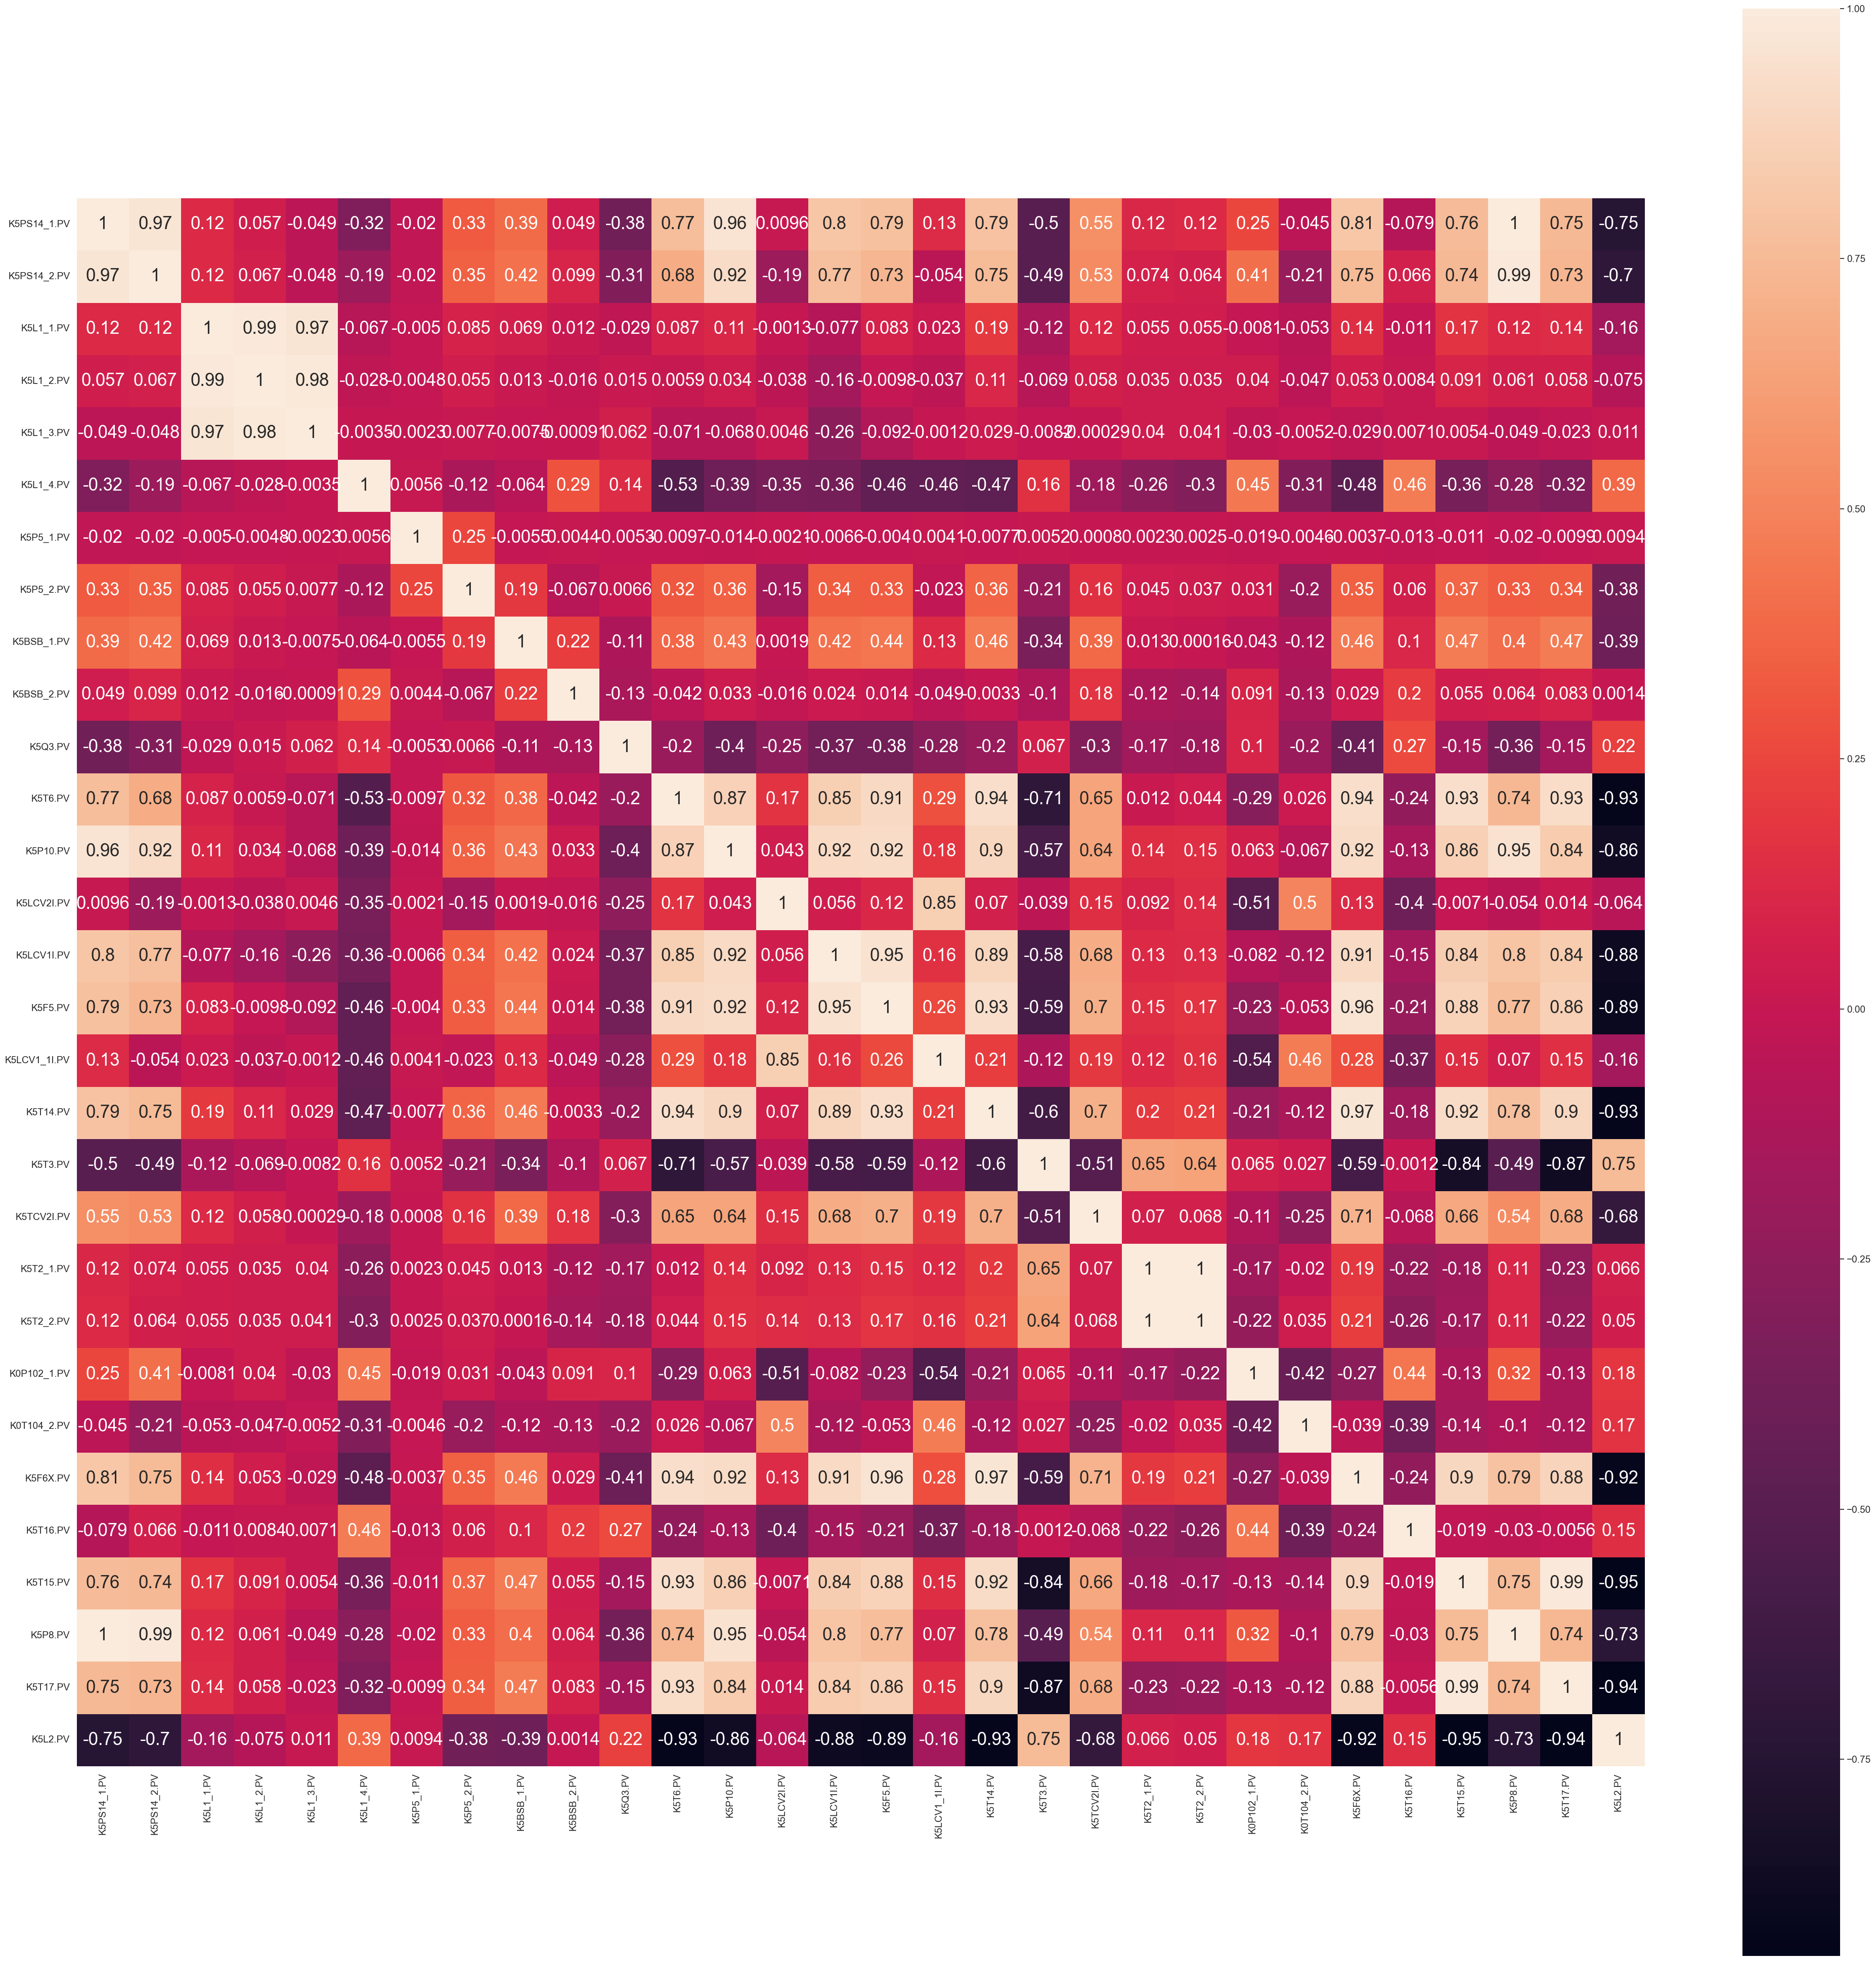

In [149]:
corrmat = df.corr()
fig,ax = plt.subplots(figsize=(50,50))
sns.set(font_scale=1.25)
sns.heatmap(corrmat, annot=True, annot_kws={'size':25}, square=True)

In [150]:
df = pd.read_csv('..\Initial_data\K5T2_2\K5T2_2.csv', ";")
df

C:\Users\arufa\AppData\Local\Temp\ipykernel_8548\3499910384.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('..\Initial_data\K5T2_2\K5T2_2.csv', ";")


,K5T3.PV,K5T2_2.PV
0,267.8794,426.8191
1,267.8715,426.6663
2,259.4806,426.6278
3,267.6669,426.4822
4,267.8410,426.4384
...,...,...
24459,250.8556,399.9684
24460,250.6335,399.9566
24461,250.6394,399.9266
24462,250.8152,399.8825


In [151]:
df=df.dropna()
df=df.round(1)
df=df.drop_duplicates(["K5T3.PV"])
df=df.drop_duplicates(["K5T2_2.PV"])
# Вычислить среднеквадратичное отклонение (standard deviation) значений y
std_y = df['K5T2_2.PV'].std()

# Определить границы для удаления выбросов в значениях y на основе среднеквадратичного отклонения
lower_bound = df['K5T3.PV'].mean() - 1.5 * std_y
upper_bound = df['K5T3.PV'].mean() + 1.5 * std_y

# Удалить выбросы из DataFrame
df = df[(df['K5T3.PV'] > lower_bound) & (df['K5T3.PV'] < upper_bound)]
df

,K5T3.PV,K5T2_2.PV
2,259.5,426.6
31,265.9,424.5
32,259.9,424.4
39,260.0,424.3
51,259.4,424.2
...,...,...
21457,246.8,405.9
22276,246.9,404.4
22674,246.5,404.0
23268,246.3,403.3


In [152]:
y = df.drop(['K5T3.PV'], axis=1)
x = df.drop(['K5T2_2.PV'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 25)
task = np.linspace(260, 290, 100)[:, np.newaxis] # Точки для предсказания

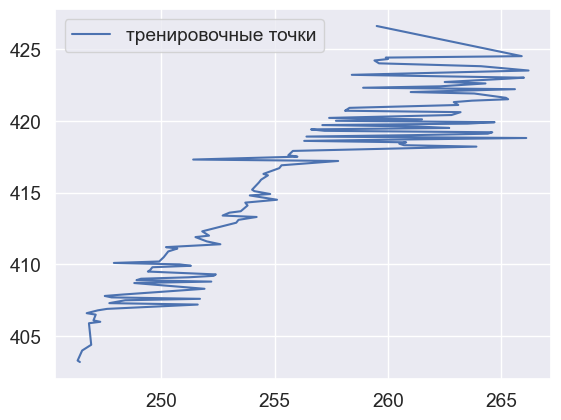

In [153]:
plt.plot(x, y, label = 'тренировочные точки') 
plt.legend(loc='upper left') 
plt.show()

C:\Users\arufa\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


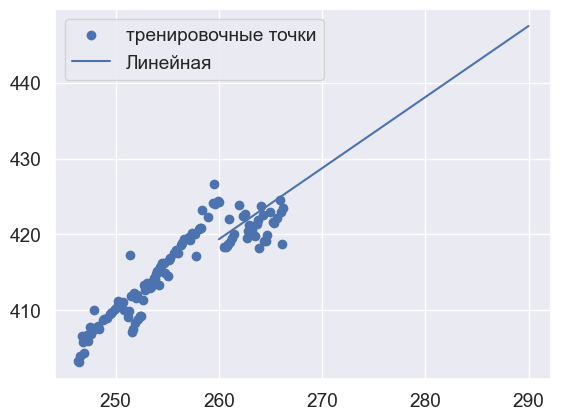

array([0.85855821, 0.70745427])

In [154]:
lr = LinearRegression() # Линейная регрессия
lr.fit(X_train, y_train) # Обучим линейную регрессию
F5 = lr.predict(task) # Предсказываем y для линейной регрессии
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, F5, label = 'Линейная') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(lr, X_test, y_test, cv=2)

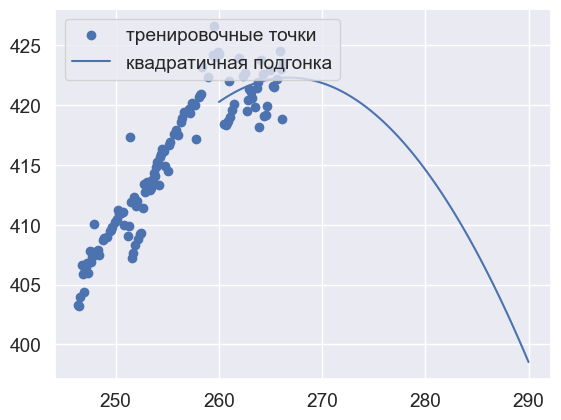

array([0.85855821, 0.70745427])

In [155]:
pr = LinearRegression() # Линейная регрессия
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X_train)       # Преобразуем данные
pr.fit(X_quad, y_train) # Обучаем полиномиальную регрессию
y_pr = pr.predict(quadratic.fit_transform(task)) # Предсказываем y для полиномиальной регрессии

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr, X_test, y_test, cv=2)

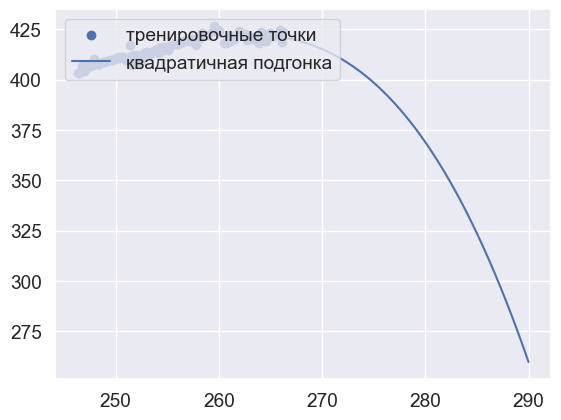

array([0.85855821, 0.70745427])

In [156]:
pr_3 = LinearRegression()
cube = PolynomialFeatures(degree=3)
X_cub = cube.fit_transform(X_train)   
pr_3.fit(X_cub, y_train)
y_pr = pr_3.predict(cube.fit_transform(task))
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr_3, X_test, y_test, cv=2)

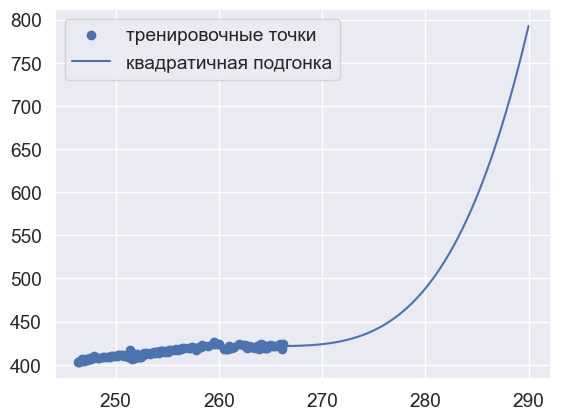

array([0.85855821, 0.70745427])

In [157]:
pr_4 = LinearRegression()
Fig = PolynomialFeatures(degree=4)
X_15 = Fig.fit_transform(X_train)   
pr_4.fit(X_15, y_train)
y_pr_4 = pr_4.predict(Fig.fit_transform(task))

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr_4, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr_4, X_test, y_test, cv=2)

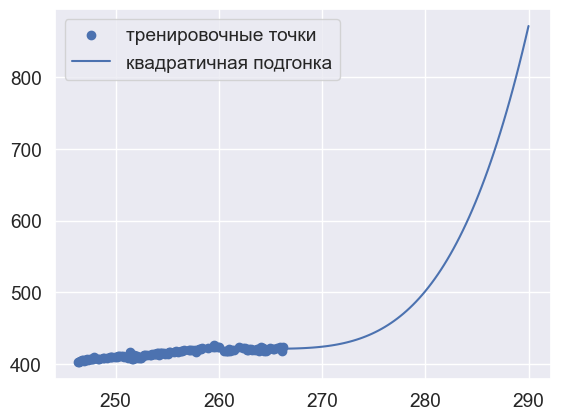

array([0.85855821, 0.70745427])

In [158]:
pr_5 = LinearRegression()
Fig = PolynomialFeatures(degree=5)
X_5 = Fig.fit_transform(X_train)   
pr_5.fit(X_5, y_train)
y_pr_5 = pr_5.predict(Fig.fit_transform(task))

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr_5, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr_5, X_test, y_test, cv=2)

C:\Users\arufa\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


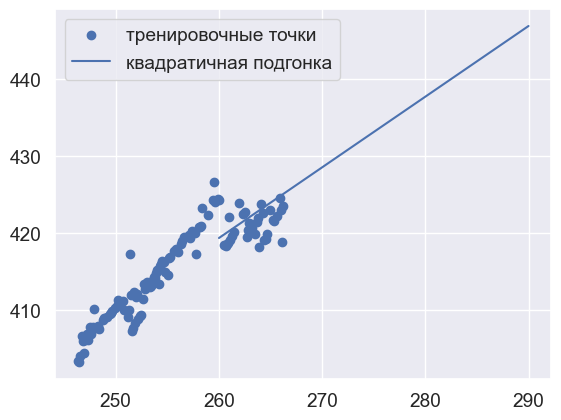

0.7903090336587596

In [159]:
lasso = MultiTaskLassoCV(cv=5, random_state=10).fit(x, y)
lasso.score(x, y)
clf = Ridge(alpha=0.5)
clf.fit(x, y)
y_pr=clf.predict(task)
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
clf.score(X_test, y_test)

In [160]:
import pickle
filename = '../model/K5T2_2.sav'
pickle.dump(clf, open(filename, 'wb'))

In [161]:
loaded_model = pickle.load(open("../model/K5T2_2.sav", 'rb'))

In [162]:
task2 = {'K5T3.PV':[320]}
df2 = pd.DataFrame(data=task2)
df2

,K5T3.PV
0,320


In [163]:
loaded_model.predict(df2)

array([[474.45117106]])